# Data Visualization with Python

**Objectives**

* Visualize Data with Python
* Get to know the MATPLOTLIB PYPLOT library
* Build line, bar, scatter and boxplot charts
* Manipulate data to build graphs

**Dataset features**

Brazilian population growth from 1980 to 2016

* Rows: 37
* Columns: 2
* File format: csv

### Implementing in Python

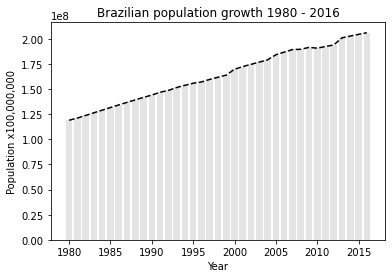

<Figure size 432x288 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt

# DataSus
data = open("brazilian_population.csv").readlines()

x = []
y = []

for i in range(len(data)):
    if i != 0: # Skip the feature name row
        line = data[i].split(";")
        x.append(int(line[0])) # Year
        y.append(int(line[1])) # Population
        
plt.bar(x, y, color="#e4e4e4")
plt.plot(x, y, color="k", linestyle="--")
plt.title("Brazilian population growth 1980 - 2016")
plt.xlabel("Year")
plt.ylabel("Population x100,000,000")
plt.show()
# To use in Python
plt.savefig("populacao_brasileira.png", dpi = 300) # Recommended resolution for printing
plt.savefig("populacao_brasileira.pdf")

### Example of boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x1760d4f0a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1760d503070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1760d4f07c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1760d503610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1760d5038e0>],
 'means': []}

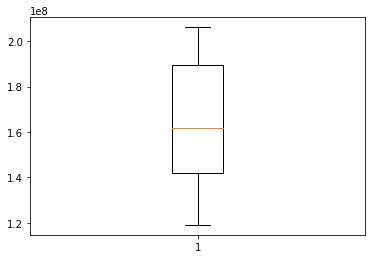

In [2]:
plt.boxplot(y)
#plt.show

# Implementing using Pandas

In [3]:
import pandas as pd

df = pd.read_csv("brazilian_population.csv", sep=";")
df

,ano,population
0,1980,119011052
1,1981,121154159
2,1982,123774229
3,1983,126403352
4,1984,129025577
5,1985,131639272
6,1986,134228492
7,1987,136780739
8,1988,139280140
9,1989,141714953


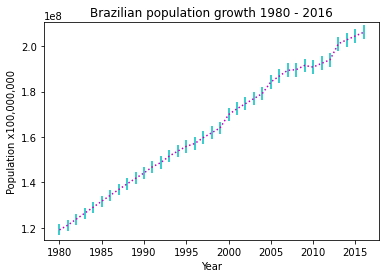

In [4]:
# Example of different marker
plt.plot(df['ano'], df['population'], color="m", linestyle=":")
# s can vary with the size of vector elements
plt.scatter(df['ano'], df['population'], color="c", marker="|", s=(df['population']/1000000)) 

plt.title("Brazilian population growth 1980 - 2016")
plt.xlabel("Year")
plt.ylabel("Population x100,000,000")
plt.show()

In [5]:
# Converting to array and spliting
x = df['ano'].to_numpy()
y = df['population'].to_numpy()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Converting one row to many rows corresponding to the number of elements from the array
model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression()

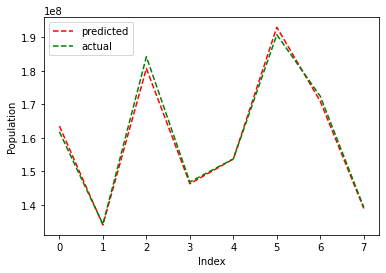

In [7]:
# Predicting and ploting
y_pred = model.predict(x_test.reshape(-1, 1))

plt.plot(range(y_pred.shape[0]), y_pred,'r--')
plt.plot(range(y_test.shape[0]), y_test,'g--')
plt.legend(['predicted', 'actual'])
plt.ylabel('Population')
plt.xlabel('Index')

plt.show()

In [8]:
from sklearn.metrics import r2_score

print('R2-score: ', r2_score(y_test, y_pred))

R2-score:  0.9924021703166082


In [9]:
import numpy as np

# Trying to predict new years
y2 = np.array([2017, 2018, 2019, 2020, 2021, 2022])

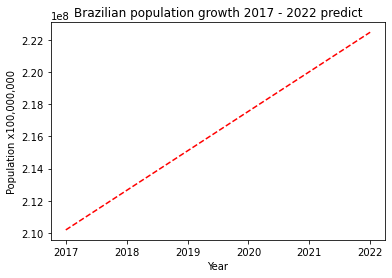

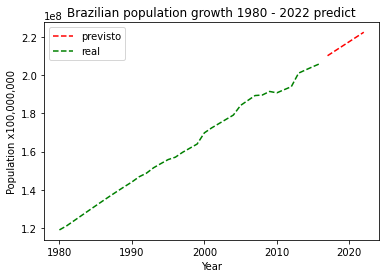

In [10]:
# Predicting from 2017 to 2022
y_pred2 = model.predict(y2.reshape(-1, 1))

plt.plot(y2, y_pred2,'r--')
plt.title("Brazilian population growth 2017 - 2022 predict")
plt.xlabel('Year')
plt.ylabel("Population x100,000,000")

plt.show()

plt.plot(y2, y_pred2,'r--')
plt.plot(x, y,'g--')
plt.title("Brazilian population growth 1980 - 2022 predict")
plt.legend(['previsto', 'real'])
plt.xlabel('Year')
plt.ylabel("Population x100,000,000")

plt.show()